In [1]:
import pandas as pd 
import os

In [2]:
df = pd.read_csv("movies_final_tagline.csv")

In [3]:
df.head()

,Title,Year,Movie_Hits,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,budget,revenue,...,TV Movie,Thriller,War,Western,Rating,overview,overview_positive,overview_negative,overview_neutral,overview_compound
0,#Alive,2020,63.0,62,1,0,0,0,6300000.0,13416285.0,...,0,0,0,0,Unknown,"As a grisly virus rampages a city, a lone man ...",0.092,0.223,0.685,-0.4215
1,(500) Days of Summer,2009,21.0,83,0,1,0,0,7500000.0,60781545.0,...,0,0,0,0,PG-13,"Tom, greeting-card writer and hopeless romanti...",0.220,0.097,0.683,0.8020
2,...And God Created Woman,1956,0.0,60,0,0,1,0,300000.0,33000000.0,...,0,0,0,0,PG,"Juliette Hardy is sexual dynamite, and has the...",0.177,0.051,0.772,0.6416
3,10 Items or Less,2006,9.0,63,0,0,1,0,400.0,1.0,...,0,0,0,0,R,An actor who is considering the role of a supe...,0.147,0.000,0.853,0.8807
4,102 Dalmatians,2000,12.0,60,0,0,0,1,85000000.0,183611771.0,...,0,0,0,0,G,Get ready for a howling good time as an all ne...,0.254,0.040,0.706,0.9438


In [4]:
df.columns

Index(['Title', 'Year', 'Movie_Hits', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'budget', 'revenue', 'runtime', 'tagline',
       'Revenue-Budget Ratio', 'Revenue-Runtime Ratio', 'tagline_compound',
       'tagline_neutral', 'tagline_negative', 'tagline_positive', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Rating',
       'overview', 'overview_positive', 'overview_negative',
       'overview_neutral', 'overview_compound'],
      dtype='object')

In [5]:
text = df[['Title', 'overview']]

In [6]:
text.head()

,Title,overview
0,#Alive,"As a grisly virus rampages a city, a lone man ..."
1,(500) Days of Summer,"Tom, greeting-card writer and hopeless romanti..."
2,...And God Created Woman,"Juliette Hardy is sexual dynamite, and has the..."
3,10 Items or Less,An actor who is considering the role of a supe...
4,102 Dalmatians,Get ready for a howling good time as an all ne...


In [7]:
# remove punctuation and make all text lowercase
import re

# Remove punctuation
df['overview_processes'] = \
df['overview'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['overview_processes'] = \
df['overview_processes'].map(lambda x: x.lower())

# Print out the first rows of papers
df['overview_processes'].head()

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_284331/2604588024.py:6: SyntaxWarning: invalid escape sequence '\.'
  df['overview'].map(lambda x: re.sub('[,\.!?]', '', x))


0    as a grisly virus rampages a city a lone man s...
1    tom greeting-card writer and hopeless romantic...
2    juliette hardy is sexual dynamite and has the ...
3    an actor who is considering the role of a supe...
4    get ready for a howling good time as an all ne...
Name: overview_processes, dtype: object

In [8]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


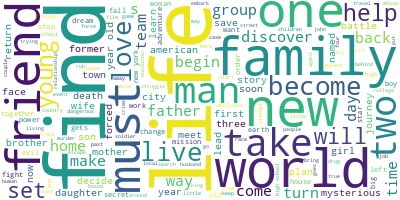

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['overview_processes'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [10]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     tiemeiap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = df.overview_processes.values.tolist()
data_words = list(sent_to_words(data))

In [13]:
## identifying the most common words
from collections import Counter

# get all words so we can count word frequencies
all_words = [word for doc in data_words for word in doc]

# Get the top 40 most frequent words
top40_words = [word for word, freq in Counter(all_words).most_common(40)]
print("Top 40 words removed:", top40_words)


Top 40 words removed: ['the', 'to', 'and', 'of', 'in', 'his', 'is', 'with', 'her', 'he', 'an', 'for', 'on', 'their', 'that', 'when', 'who', 'as', 'by', 'from', 'but', 'they', 'after', 'into', 'she', 'has', 'are', 'life', 'him', 'new', 'at', 'up', 'it', 'world', 'one', 'out', 'family', 'be', 'young', 'man']


In [14]:

stop_words = stopwords.words('english')
stop_words.extend(top40_words)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['grisly', 'virus', 'rampages', 'city', 'lone', 'stays', 'locked', 'inside', 'apartment', 'digitally', 'cut', 'seeking', 'help', 'desperate', 'find', 'way']


In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [16]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"love" + 0.004*"friends" + 0.003*"two" + 0.003*"school" + '
  '0.003*"must" + 0.003*"father" + 0.003*"soon" + 0.003*"mother" + '
  '0.003*"find" + 0.002*"finds"'),
 (1,
  '0.004*"old" + 0.003*"two" + 0.003*"must" + 0.003*"year" + 0.003*"find" + '
  '0.003*"home" + 0.003*"back" + 0.002*"city" + 0.002*"high" + 0.002*"first"'),
 (2,
  '0.004*"finds" + 0.003*"years" + 0.003*"must" + 0.003*"old" + 0.003*"true" + '
  '0.003*"story" + 0.002*"find" + 0.002*"mysterious" + 0.002*"help" + '
  '0.002*"love"'),
 (3,
  '0.003*"must" + 0.003*"old" + 0.003*"team" + 0.002*"find" + 0.002*"lives" + '
  '0.002*"wife" + 0.002*"get" + 0.002*"town" + 0.002*"two" + 0.002*"help"')]


In [17]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/opt/tljh/user/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=284331) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/tljh/user/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=284331) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/tljh/user/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=284331) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/tljh/user/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=284331) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/tljh/user/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWa

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.008548 -0.048106       1        1  28.735200
0     -0.044797  0.023547       2        1  27.120081
1      0.024879  0.015447       3        1  23.888816
3      0.028466  0.009111       4        1  20.255904, topic_info=         Term       Freq      Total Category  logprob  loglift
27       love  97.000000  97.000000  Default  30.0000  30.0000
48    friends  88.000000  88.000000  Default  29.0000  29.0000
985      star  37.000000  37.000000  Default  28.0000  28.0000
724    mother  63.000000  63.000000  Default  27.0000  27.0000
319     small  47.000000  47.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
48    friends  15.126841  88.953309   Topic4  -6.2961  -0.1749
430      take  13.096521  64.792880   Topic4  -6.4403  -0.0021
192     group  13.471668  72.252980   Topic4  -6.4120  -0.0829
163      year  13.712675  78.331218   Topic4  -6.3943  -0.1459
1002    finds  13.748334  98.391424   Topic4  -6.3917  -0.3713

[356 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1403      1  0.409269  agent
1403      2  0.281373  agent
1403      3  0.153476  agent
1403      4  0.153476  agent
387       1  0.283619  along
...     ...       ...    ...
163       4  0.178728   year
380       1  0.426193  years
380       2  0.194831  years
380       3  0.182654  years
380       4  0.182654  years

[667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [22]:
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=35, formatted=False):
    print(f"Topic {i}: {[word for word, prob in topic]}")

Topic 0: ['love', 'friends', 'two', 'school', 'must', 'father', 'soon', 'mother', 'find', 'finds', 'old', 'becomes', 'home', 'girl', 'son', 'day', 'time', 'house', 'death', 'best', 'named', 'save', 'friend', 'take', 'year', 'mysterious', 'brother', 'war', 'former', 'comes', 'wife', 'journey', 'daughter', 'town', 'high']
Topic 1: ['old', 'two', 'must', 'year', 'find', 'home', 'back', 'city', 'high', 'first', 'group', 'help', 'get', 'take', 'town', 'star', 'time', 'lives', 'three', 'story', 'school', 'finds', 'father', 'girl', 'together', 'years', 'former', 'becomes', 'mission', 'wants', 'game', 'left', 'way', 'day', 'mother']
Topic 2: ['finds', 'years', 'must', 'old', 'true', 'story', 'find', 'mysterious', 'help', 'love', 'city', 'time', 'war', 'takes', 'group', 'save', 'get', 'woman', 'gets', 'way', 'begins', 'order', 'friends', 'back', 'team', 'two', 'lives', 'father', 'school', 'parents', 'daughter', 'son', 'american', 'year', 'crime']
Topic 3: ['must', 'old', 'team', 'find', 'lives'

0	Coming-of-Age & Family / School-Centered Stories
1	Mystery / Rescue / Secret-Driven Adventure
2	Romance, Relationships & Emotional Life Journey
3	Small-Town Conflict & Hero vs. Evil Narrative 

In [25]:
# Initialize topic columns in df
for t in range(num_topics):
    df[f"topic_{t}"] = 0.0

# Fill topic distribution for each movie/document
for i, bow in enumerate(corpus):
    topic_dist = lda_model.get_document_topics(bow)   # list of (topic_id, prob)
    for topic_id, prob in topic_dist:
        df.loc[i, f"topic_{topic_id}"] = prob

In [26]:
df.head()

,Title,Year,Movie_Hits,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,budget,revenue,...,overview,overview_positive,overview_negative,overview_neutral,overview_compound,overview_processes,topic_0,topic_1,topic_2,topic_3
0,#Alive,2020,63.0,62,1,0,0,0,6300000.0,13416285.0,...,"As a grisly virus rampages a city, a lone man ...",0.092,0.223,0.685,-0.4215,as a grisly virus rampages a city a lone man s...,0.015336,0.015286,0.954119,0.015259
1,(500) Days of Summer,2009,21.0,83,0,1,0,0,7500000.0,60781545.0,...,"Tom, greeting-card writer and hopeless romanti...",0.220,0.097,0.683,0.8020,tom greeting-card writer and hopeless romantic...,0.971025,0.000000,0.000000,0.000000
2,...And God Created Woman,1956,0.0,60,0,0,1,0,300000.0,33000000.0,...,"Juliette Hardy is sexual dynamite, and has the...",0.177,0.051,0.772,0.6416,juliette hardy is sexual dynamite and has the ...,0.013028,0.960963,0.012833,0.013176
3,10 Items or Less,2006,9.0,63,0,0,1,0,400.0,1.0,...,An actor who is considering the role of a supe...,0.147,0.000,0.853,0.8807,an actor who is considering the role of a supe...,0.317286,0.000000,0.669041,0.000000
4,102 Dalmatians,2000,12.0,60,0,0,0,1,85000000.0,183611771.0,...,Get ready for a howling good time as an all ne...,0.254,0.040,0.706,0.9438,get ready for a howling good time as an all ne...,0.000000,0.980500,0.000000,0.000000


In [27]:
df.rename(columns={"topic_0": "Personal Growth Drama"}, inplace=True)
df.rename(columns={"topic_1": "Group Conflict"}, inplace=True)
df.rename(columns={"topic_2": "Mission-Driven Thriller"}, inplace=True)
df.rename(columns={"topic_3": "Small-Town Heroism"}, inplace=True)

In [28]:
df.head()

,Title,Year,Movie_Hits,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,budget,revenue,...,overview,overview_positive,overview_negative,overview_neutral,overview_compound,overview_processes,Personal Growth Drama,Group Conflict,Mission-Driven Thriller,Small-Town Heroism
0,#Alive,2020,63.0,62,1,0,0,0,6300000.0,13416285.0,...,"As a grisly virus rampages a city, a lone man ...",0.092,0.223,0.685,-0.4215,as a grisly virus rampages a city a lone man s...,0.015336,0.015286,0.954119,0.015259
1,(500) Days of Summer,2009,21.0,83,0,1,0,0,7500000.0,60781545.0,...,"Tom, greeting-card writer and hopeless romanti...",0.220,0.097,0.683,0.8020,tom greeting-card writer and hopeless romantic...,0.971025,0.000000,0.000000,0.000000
2,...And God Created Woman,1956,0.0,60,0,0,1,0,300000.0,33000000.0,...,"Juliette Hardy is sexual dynamite, and has the...",0.177,0.051,0.772,0.6416,juliette hardy is sexual dynamite and has the ...,0.013028,0.960963,0.012833,0.013176
3,10 Items or Less,2006,9.0,63,0,0,1,0,400.0,1.0,...,An actor who is considering the role of a supe...,0.147,0.000,0.853,0.8807,an actor who is considering the role of a supe...,0.317286,0.000000,0.669041,0.000000
4,102 Dalmatians,2000,12.0,60,0,0,0,1,85000000.0,183611771.0,...,Get ready for a howling good time as an all ne...,0.254,0.040,0.706,0.9438,get ready for a howling good time as an all ne...,0.000000,0.980500,0.000000,0.000000


In [29]:
df.to_csv("movies_topic_modeling.csv", index=False)

In [2]:
df = pd.read_csv("movies_topic_modeling.csv")

In [25]:
colors = { "Netflix": "firebrick", "Prime Video":"royalblue", "Disney+":"lightseagreen", "Hulu":"lime" }

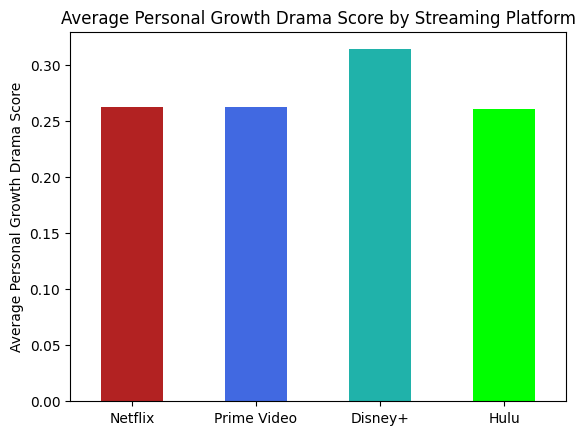

In [27]:
# calculate average sentiment for movies on each platform
avg_growth = {
    'Netflix': df[df['Netflix'] == 1]['Personal Growth Drama'].mean(),
    'Prime Video': df[df['Prime Video'] == 1]['Personal Growth Drama'].mean(),
    'Disney+': df[df['Disney+'] == 1]['Personal Growth Drama'].mean(),
    'Hulu': df[df['Hulu'] == 1]['Personal Growth Drama'].mean()
}

avg_df = pd.DataFrame.from_dict(avg_growth, orient='index', columns=['Average Personal Growth'])

import matplotlib.pyplot as plt

avg_df['Average Personal Growth'].plot(kind='bar',
                                       color=[colors[p] for p in avg_df.index],
                                       legend=False)

plt.ylabel("Average Personal Growth Drama Score")
plt.title("Average Personal Growth Drama Score by Streaming Platform")
plt.xticks(rotation=0)

plt.show()

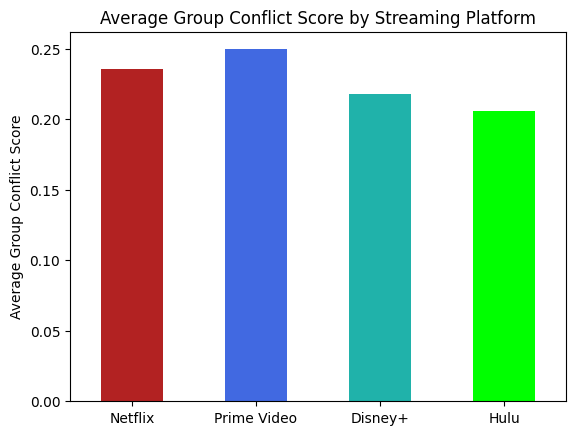

In [30]:
# calculate average sentiment for movies on each platform
avg_conflict = {
    'Netflix': df[df['Netflix'] == 1]['Group Conflict'].mean(),
    'Prime Video': df[df['Prime Video'] == 1]['Group Conflict'].mean(),
    'Disney+': df[df['Disney+'] == 1]['Group Conflict'].mean(),
    'Hulu': df[df['Hulu'] == 1]['Group Conflict'].mean()
}

avg_df2 = pd.DataFrame.from_dict(avg_conflict, orient='index', columns=['Average Group Conflict'])

avg_df2['Average Group Conflict'].plot(kind='bar',
                                       color=[colors[p] for p in avg_df.index],
                                       legend=False)

plt.ylabel("Average Group Conflict Score")
plt.title("Average Group Conflict Score by Streaming Platform")
plt.xticks(rotation=0)

plt.show()

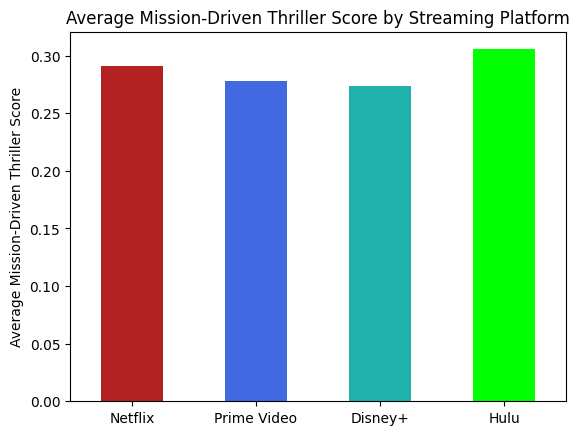

In [31]:
# calculate average sentiment for movies on each platform
avg_mission = {
    'Netflix': df[df['Netflix'] == 1]['Mission-Driven Thriller'].mean(),
    'Prime Video': df[df['Prime Video'] == 1]['Mission-Driven Thriller'].mean(),
    'Disney+': df[df['Disney+'] == 1]['Mission-Driven Thriller'].mean(),
    'Hulu': df[df['Hulu'] == 1]['Mission-Driven Thriller'].mean()
}

avg_df3 = pd.DataFrame.from_dict(avg_mission, orient='index', columns=['Average Mission-Driven Thriller'])


avg_df3['Average Mission-Driven Thriller'].plot(kind='bar',
                                       color=[colors[p] for p in avg_df.index],
                                       legend=False)

plt.ylabel("Average Mission-Driven Thriller Score")
plt.title("Average Mission-Driven Thriller Score by Streaming Platform")
plt.xticks(rotation=0)

plt.show()

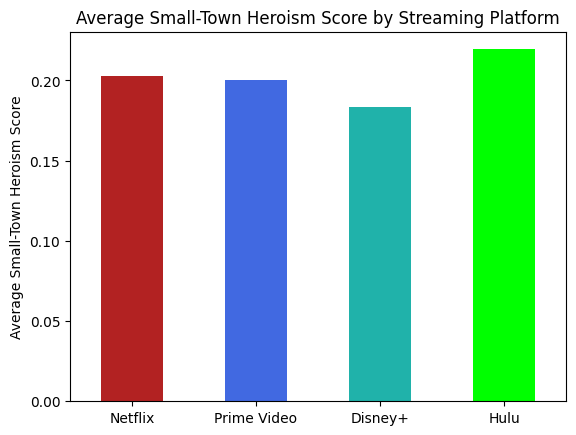

In [32]:
# calculate average sentiment for movies on each platform
avg_hero = {
    'Netflix': df[df['Netflix'] == 1]['Small-Town Heroism'].mean(),
    'Prime Video': df[df['Prime Video'] == 1]['Small-Town Heroism'].mean(),
    'Disney+': df[df['Disney+'] == 1]['Small-Town Heroism'].mean(),
    'Hulu': df[df['Hulu'] == 1]['Small-Town Heroism'].mean()
}

avg_df4 = pd.DataFrame.from_dict(avg_hero, orient='index', columns=['Average Small-Town Heroism'])


avg_df4['Average Small-Town Heroism'].plot(kind='bar',
                                       color=[colors[p] for p in avg_df.index],
                                       legend=False)

plt.ylabel("Average Small-Town Heroism Score")
plt.title("Average Small-Town Heroism Score by Streaming Platform")
plt.xticks(rotation=0)

plt.show()